# Power Analysis Example

---

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.power import TTestIndPower

plt.style.use("fivethirtyeight")
%matplotlib inline

---

E' in corso l'analisi di un farmaco per abbassare la pressione. Nell'esperimento sono coinvolte 200 persone, che vengono divise randomicamente nel *treatment* e nel *control group*. L'ipotesi nulla afferma che non ci sia differenza nella media di pressione dei pazienti del *treatment* e del *control*, mentre l'ipotesi alternativa afferma che esiste una qualche differenza fra queste pressioni medie.

Gli studi precedenti riportano 12mmHG come deviazione standard della distribuzione delle pressioni sanguigne dei pazienti. Avendo informazioni sulla deviazione standard dell'intera popolazione, possiamo modellare la *sampling distribution* con la distribuzione normale (e non la *t*). Calcoliamo lo *standard error* per la nostra *sampling distribution*:

$$\large SE_{(\bar{x_1}-\bar{x_2})}=
\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}=
\sqrt{\frac{12^2}{100}+\frac{12^2}{100}}=1.7mmHg$$

Sfruttando il *CLT* possiamo rappresentare la *sampling distribution* come una normale centrata su zero (*null value*) e con *standard error* 1.7.

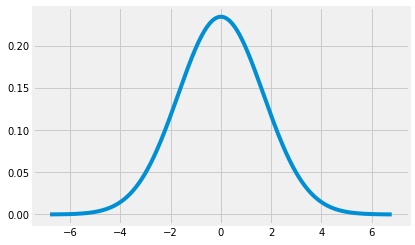

In [2]:
mu = 0
se = 1.7

lower_end = mu - 4*se
higher_end = mu + 4*se
x_axis = np.linspace(start = lower_end, stop = higher_end, num = 1000)

fig, ax = plt.subplots(figsize = (6, 4))
ax.plot(x_axis, stats.norm.pdf(x_axis, mu, se))
plt.grid(True)
plt.show()

Quando proviamo a rigettare un'ipotesi nulla in un *two-sided test*, sappiamo che la *point estimate* deve trovarsi in una delle due **reject regions** alle estremità della distribuzione normale. Usando il classico *significance level* di $\alpha=0.05$ (che in fondo corrisponde a calcolare un *95% CI*), ogni *reject region* occuperà un'area pari al 2.5% del totale. Il confine che delimita l'inizio della *reject region*, quindi, si trova a $1.96$ *standard errors* dalla media.

Nell'esempio in questione, la *reject region* inizierà a $1.96\times 1.7=3.332mmHg$.

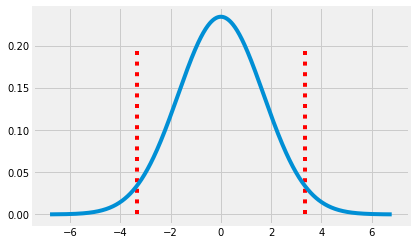

In [3]:
mu = 0
se = 1.7

lower_end = mu - 4*se
higher_end = mu + 4*se
x_axis = np.linspace(start = lower_end, stop = higher_end, num = 1000)

crit_value = stats.norm.ppf(q = 0.975)
lower_end_reject = -crit_value*se
higher_end_reject = crit_value*se

fig, ax = plt.subplots(figsize = (6, 4))
ax.plot(x_axis, stats.norm.pdf(x_axis, mu, se))
plt.vlines(lower_end_reject, 0, 0.2, linestyles="dotted", colors="r")
plt.vlines(higher_end_reject, 0, 0.2, linestyles="dotted", colors="r")
plt.grid(True)
plt.show()

Supponiamo che il nostro obiettivo sia osservare una differenza di almeno 3mmHg fra i due trattamenti, cioè il **minimum effect size** è pari a 3. Vogliamo capire quale sia il *power* del test capace di individuare una differenza simile.

Se il nuovo farmaco fosse davvero efficace, e portasse quindi ad una differenza di 3mmHg nella misurazione della pressione, la distribuzione delle *differenze* di pressione fra i due gruppi sarebbe sempre *normale*, ma decentrata rispetto al *null value* di un valore pari proprio all'*effect size*.

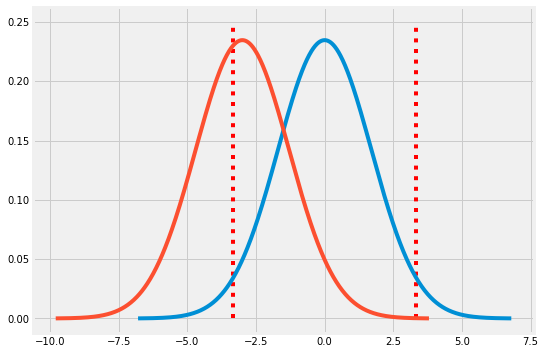

In [4]:
mu = 0
se = 1.7
effect_size = 3

lower_end_null = mu - 4*se
higher_end_null = mu + 4*se
x_axis_null = np.linspace(lower_end_null, higher_end_null, 1000)

lower_end_effect = (mu-effect_size)-4*se
higher_end_effect = (mu-effect_size)+4*se
x_axis_effect = np.linspace(lower_end_effect, higher_end_effect, 1000)

crit_value = stats.norm.ppf(q = 0.975)
lower_end_reject = -crit_value*se
higher_end_reject = crit_value*se

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(x_axis_null, stats.norm.pdf(x_axis_null, mu, se))
ax.plot(x_axis_effect, stats.norm.pdf(x_axis_effect, (mu-effect_size), se))
plt.vlines(lower_end_reject, 0, 0.25, linestyles="dotted", colors="r")
plt.vlines(higher_end_reject, 0, 0.25, linestyles="dotted", colors="r")
plt.grid(True)
plt.show()

Sappiamo che possiamo rigettare l'ipotesi nulla solo se la reale differenza osservata è inferiore rispetto al confine della *reject region* della distribuzione nulla, che è pari a $-1.96\times 1.7=-3.332$. Di conseguenza, la probabilità di rigettare l'ipotesi nulla è pari all'area sottesa alla curva dell'*effect size* alla sinistra della *reject region*. Questa probabilità coincide esattamente con il **power** del test.

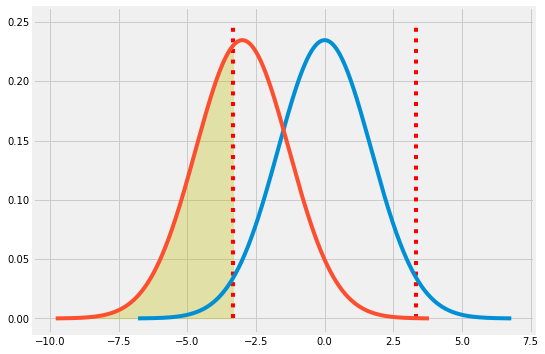

In [5]:
mu = 0
se = 1.7
effect_size = 3

lower_end_null = mu - 4*se
higher_end_null = mu + 4*se
x_axis_null = np.linspace(lower_end_null, higher_end_null, 1000)

lower_end_effect = (mu-effect_size)-4*se
higher_end_effect = (mu-effect_size)+4*se
x_axis_effect = np.linspace(lower_end_effect, higher_end_effect, 1000)

crit_value = stats.norm.ppf(q = 0.975)
lower_end_reject = -crit_value*se
higher_end_reject = crit_value*se

x_area = np.linspace(lower_end_effect, lower_end_reject, 1000)

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(x_axis_null, stats.norm.pdf(x_axis_null, mu, se))
ax.plot(x_axis_effect, stats.norm.pdf(x_axis_effect, (mu-effect_size), se))
ax.fill_between(x_area, stats.norm.pdf(x_area, (mu-effect_size), se), alpha = 0.3, color="y")
plt.vlines(lower_end_reject, 0, 0.25, linestyles="dotted", colors="r")
plt.vlines(higher_end_reject, 0, 0.25, linestyles="dotted", colors="r")
plt.grid(True)
plt.show()

In [6]:
stats.norm.cdf(x = -3.332, loc = -3, scale = 1.7)

0.42258135092561655

Abbiamo un **power** pari al 42% quando l'*effect size* è 3 e il *sample size* di ogni gruppo è 100. Se l'obiettivo è un *power* pari all'80%, dobbiamo lavorare a ritroso. Iniziamo calcolando l'80° percentile della *standard normal*.

In [7]:
stats.norm.ppf(q = 0.8)

0.8416212335729143

Vuol dire che dal centro della distribuzione centrata sull'*effect size* alla *reject region* della *null distribution* devono esserci esattamente $0.84 \times Std.Error$. Sappiamo anche che la distanza fra il centro della *null distribution* e la *reject region* è pari a $1.96\times Std.Error$. La somma di queste due distanze è per forza uguale all'*effect size*, dato che si tratta della distanza fra i centri delle due distribuzioni. In questo modo otteniamo un'equazione che ci permette di risolvere per il *sample size*.

$$0.84SE+1.96SE=3$$

$$SE=1.07=\sqrt{\frac{12^2}{n}+\frac{12^2}{n}}$$

$$n=250.88$$

Per avere un power all'80% e riconoscere una differenza di almeno 3mmHg, abbiamo bisogno di almeno 251 soggetti in ciascun gruppo.

---